In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import librosa.display
import pywt
import numpy as np
import wave
import struct
from google.colab import drive
import os
from glob import glob
import noisereduce as nr
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
import shutil

In [ ]:
drive.mount('/content/drive')
directory = "/content"
base_path = "/content/drive/MyDrive/Data Tugas Akhir"
mi_path = f'{base_path}{os.sep}MI/'
audio_files_mi = glob(mi_path  + '*.wav')
Preprocess_mi = f'{base_path}{os.sep}Preprocess_MI/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_AS = '/content/drive/MyDrive/Data Tugas Akhir/MI/'
audio_files_mi = glob(data_AS  + '*.wav')

print(f'Number of AS audios : {len(audio_files_mi)}')

Number of AS audios : 280


In [ ]:
for file in os.listdir(mi_path):
    print(file)

Copy of Yeyet Mulyati Ningsih_APEX_24 April 2022.wav
Copy of Ai Jatnika_LLSB_13 Mei 2022.wav
Copy of Ai Jatnika_LUSB_13 Mei 2022.wav
Copy of Ai Jatnika_APEX_13 Mei 2022.wav
Copy of Ai Istiqomah_APEX_28 Juni 2022.wav
Copy of Agus Mulyatmo_LUSB_21 Februari 2022.wav
Copy of Agus Mulyatmo_LLSB_21 Februari 2022.wav
Copy of Ai Istiqomah_LUSB_28 Juni 2022.wav
Copy of Ai Istiqomah_RUSB_28 Juni 2022_1.wav
Copy of Ai Istiqomah_LLSB_28 Juni 2022.wav
Copy of Agus Mulyatmo_RUSB_21 Februari 2022_1.wav
Copy of Adang Wigena_RUSB_6 Juni 2022_1.wav
Copy of Agus Mulyatmo_APEX_21 Februari 2022.wav
Copy of Adang Wigena_APEX_6 Juni 2022.wav
Copy of Adang Kurnia_LLSB_14 Maret 2022.wav
Copy of Adang Kurnia_APEX_14 Maret 2022.wav
Copy of Adang Kurnia_RUSB_14 Maret 2022_1.wav
Copy of Adang Wigena_LLSB_6 Juni 2022.wav
Copy of Adang Wigena_LUSB_6 Juni 2022.wav
LUSB.wav
Copy of Yeyet Mulyati Ningsih_RUSB_24 April 2022_1.wav
Copy of Yeyet Mulyati Ningsih_LUSB_24 April 2022.wav
Copy of Yeyet Mulyati Ningsih_LLSB_24 

In [ ]:
print(f'Number of AS audios : {len(mi_path)}')

Number of AS audios : 43


In [ ]:
import numpy as np
import scipy.io

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
Raw_SNR = []

for file in range(0, len(audio_files_mi),1):

  audio, sfreq = librosa.load(audio_files_mi[file])
  snr = signaltonoise(audio)
  Raw_SNR.append(snr)

In [ ]:
Raw_SNR

[array(-8.33675949e-05),
 array(2.39962465e-05),
 array(4.25034923e-05),
 array(-2.36120704e-05),
 array(0.00012278),
 array(1.67208805e-06),
 array(-0.00024837),
 array(-4.02967962e-05),
 array(0.00015042),
 array(7.30967088e-07),
 array(-9.90488916e-05),
 array(-0.00034519),
 array(-0.00014224),
 array(-0.0001141),
 array(0.00017423),
 array(3.79784979e-05),
 array(-1.86484449e-05),
 array(2.7084418e-06),
 array(7.69988037e-05),
 array(-1.83447264e-05),
 array(0.00027798),
 array(9.82117272e-05),
 array(1.00655243e-05),
 array(-1.10617775e-05),
 array(7.13579357e-05),
 array(-2.53402322e-05),
 array(-3.24927605e-05),
 array(-6.57057026e-05),
 array(-0.00010587),
 array(0.00046875),
 array(-0.00031298),
 array(-0.00010448),
 array(8.53351667e-05),
 array(1.39552658e-05),
 array(1.69410068e-05),
 array(-0.00022202),
 array(-0.00018172),
 array(0.00010361),
 array(-2.39438323e-05),
 array(-2.84809212e-05),
 array(0.00012808),
 array(-0.00012095),
 array(-9.4998737e-05),
 array(-0.000152

In [ ]:
denoised_file = []
i = 1

for file in range(0, len(audio_files_mi),1):

  audio, sfreq = librosa.load(audio_files_mi[file])
  denoised_name =  "Preprocessed_MI_%s.wav" % i
  reduced_noise = nr.reduce_noise(y = audio, sr=sfreq, n_std_thresh_stationary=2,stationary=True)
  wavfile.write(denoised_name, sfreq, reduced_noise)
  denoised_file.append(denoised_name)
  fig, ax = plt.subplots(figsize=(20,3))
  ax.plot(reduced_noise)
  ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')

  i=i+1
  plt.show()

In [ ]:
denoised_SNR = []
i = 1

for file in range(0, len(audio_files_mi),1):

  audio, sfreq = librosa.load(audio_files_mi[file])
  reduced_noise = nr.reduce_noise(y = audio, sr=sfreq, n_std_thresh_stationary=2,stationary=True)
  snr = signaltonoise(reduced_noise)
  denoised_SNR.append(snr)

In [ ]:
denoised_SNR

[array(-0.00039773),
 array(-6.96283023e-05),
 array(0.00012578),
 array(3.94231211e-06),
 array(0.00017916),
 array(0.00010299),
 array(0.00013714),
 array(-2.38346684e-06),
 array(-8.62766774e-06),
 array(0.00012909),
 array(-4.05695282e-05),
 array(-2.90418338e-05),
 array(-6.57480487e-05),
 array(7.60045732e-05),
 array(0.00014899),
 array(1.8816243e-05),
 array(-3.66079547e-07),
 array(3.92929069e-05),
 array(2.096143e-05),
 array(-1.31095157e-05),
 array(0.0002081),
 array(6.49357389e-05),
 array(0.00038153),
 array(-4.85960445e-05),
 array(8.15317435e-06),
 array(-3.98443553e-05),
 array(-6.90032584e-06),
 array(-8.16668376e-07),
 array(2.41319867e-05),
 array(5.0387639e-06),
 array(-0.00032202),
 array(0.00043395),
 array(3.52921506e-06),
 array(3.2370699e-05),
 array(3.75786258e-05),
 array(-0.00021894),
 array(0.00024782),
 array(0.00048632),
 array(-0.00024748),
 array(0.0004843),
 array(6.29645583e-05),
 array(-0.00013045),
 array(-6.55189797e-05),
 array(6.99999728e-05),
 

In [ ]:
print(len(denoised_file))

280


In [ ]:
denoised_file

['Preprocessed_MI_1.wav',
 'Preprocessed_MI_2.wav',
 'Preprocessed_MI_3.wav',
 'Preprocessed_MI_4.wav',
 'Preprocessed_MI_5.wav',
 'Preprocessed_MI_6.wav',
 'Preprocessed_MI_7.wav',
 'Preprocessed_MI_8.wav',
 'Preprocessed_MI_9.wav',
 'Preprocessed_MI_10.wav',
 'Preprocessed_MI_11.wav',
 'Preprocessed_MI_12.wav',
 'Preprocessed_MI_13.wav',
 'Preprocessed_MI_14.wav',
 'Preprocessed_MI_15.wav',
 'Preprocessed_MI_16.wav',
 'Preprocessed_MI_17.wav',
 'Preprocessed_MI_18.wav',
 'Preprocessed_MI_19.wav',
 'Preprocessed_MI_20.wav',
 'Preprocessed_MI_21.wav',
 'Preprocessed_MI_22.wav',
 'Preprocessed_MI_23.wav',
 'Preprocessed_MI_24.wav',
 'Preprocessed_MI_25.wav',
 'Preprocessed_MI_26.wav',
 'Preprocessed_MI_27.wav',
 'Preprocessed_MI_28.wav',
 'Preprocessed_MI_29.wav',
 'Preprocessed_MI_30.wav',
 'Preprocessed_MI_31.wav',
 'Preprocessed_MI_32.wav',
 'Preprocessed_MI_33.wav',
 'Preprocessed_MI_34.wav',
 'Preprocessed_MI_35.wav',
 'Preprocessed_MI_36.wav',
 'Preprocessed_MI_37.wav',
 'Preproce

In [ ]:
for f in denoised_file:
    src_path = os.path.join(directory, f)
    dst_path = os.path.join(Preprocess_mi, f)
    shutil.move(src_path, dst_path)

**APEX**

Text(0.5, 1.0, 'Sample of Myocardial Infarction Phonocardiogram (Apex)')

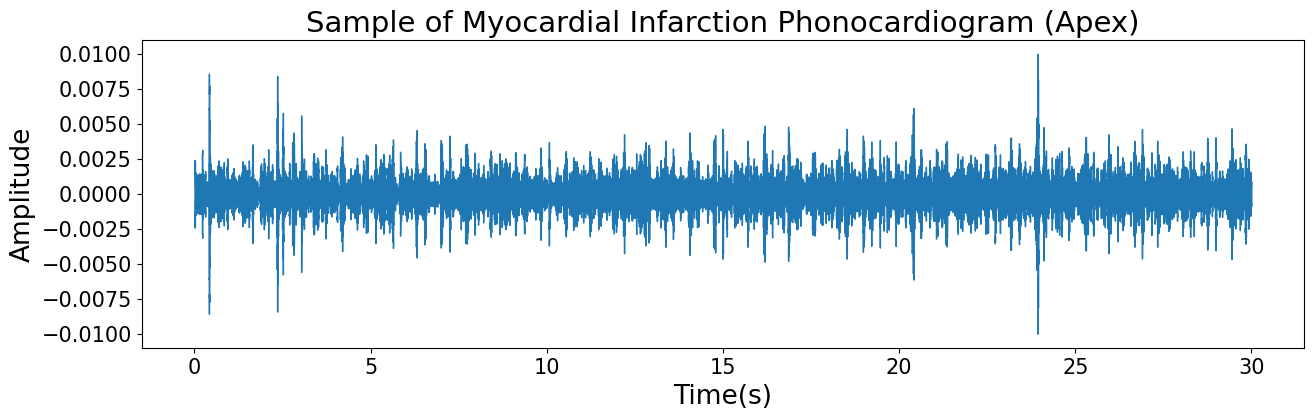

In [ ]:
file = mi_path + "Copy of Adang Wigena_APEX_6 Juni 2022.wav"
signal, sr = librosa.load(file)
plt.figure(figsize=(15,4))
librosa.display.waveshow(signal, sr = sr)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Sample of Myocardial Infarction Phonocardiogram (Apex)', size=21)

Text(0.5, 1.0, 'Denoised Myocardial Infarction Phonocardiogram (Apex)')

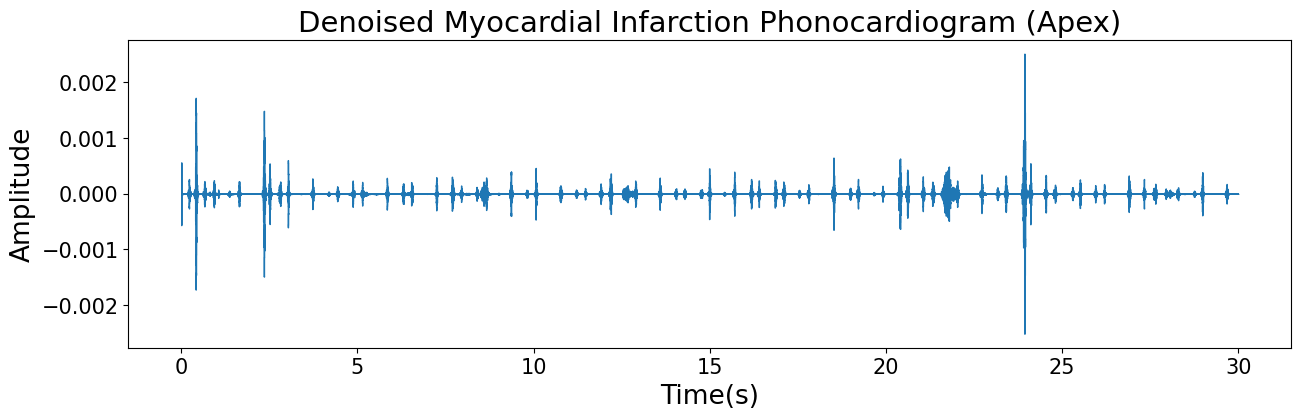

In [ ]:
audio, sfreq = librosa.load(file)
reduced_noise = nr.reduce_noise(y = audio, sr=sfreq, n_std_thresh_stationary=2,stationary=True)
plt.figure(figsize=(15,4))
librosa.display.waveshow(reduced_noise)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Denoised Myocardial Infarction Phonocardiogram (Apex)', size=21)

Text(0.5, 1.0, 'Sample of Myocardial Infarction Phonocardiogram (LUSB)')

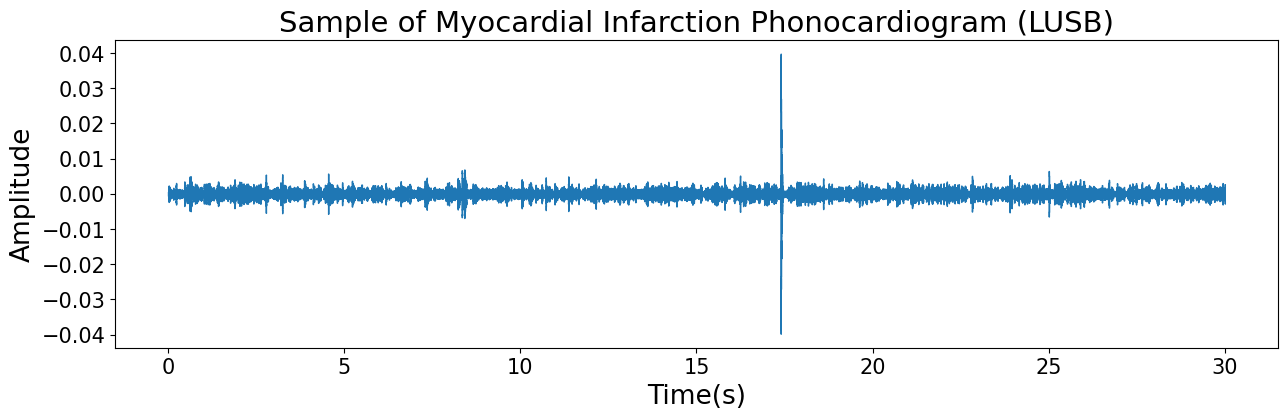

In [ ]:
file = mi_path + "Copy of Adang Wigena_LUSB_6 Juni 2022.wav"
signal, sr = librosa.load(file)
plt.figure(figsize=(15,4))
librosa.display.waveshow(signal, sr = sr)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Sample of Myocardial Infarction Phonocardiogram (LUSB)', size=21)

Text(0.5, 1.0, 'Denoised Myocardial Infarction Phonocardiogram (LUSB)')

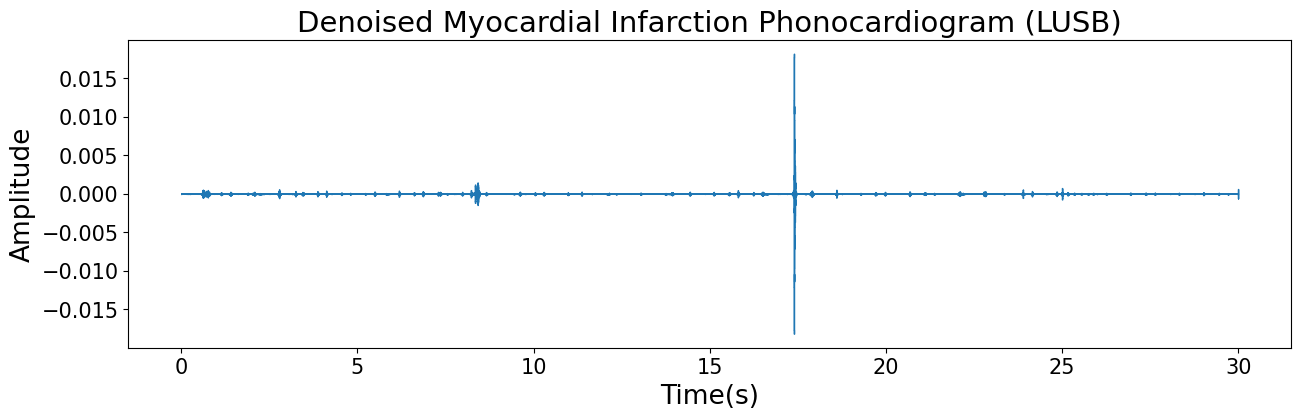

In [ ]:
audio, sfreq = librosa.load(file)
reduced_noise = nr.reduce_noise(y = audio, sr=sfreq, n_std_thresh_stationary=2,stationary=True)
plt.figure(figsize=(15,4))
librosa.display.waveshow(reduced_noise)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Denoised Myocardial Infarction Phonocardiogram (LUSB)', size=21)

Text(0.5, 1.0, 'Sample of Myocardial Infarction Phonocardiogram (LLSB)')

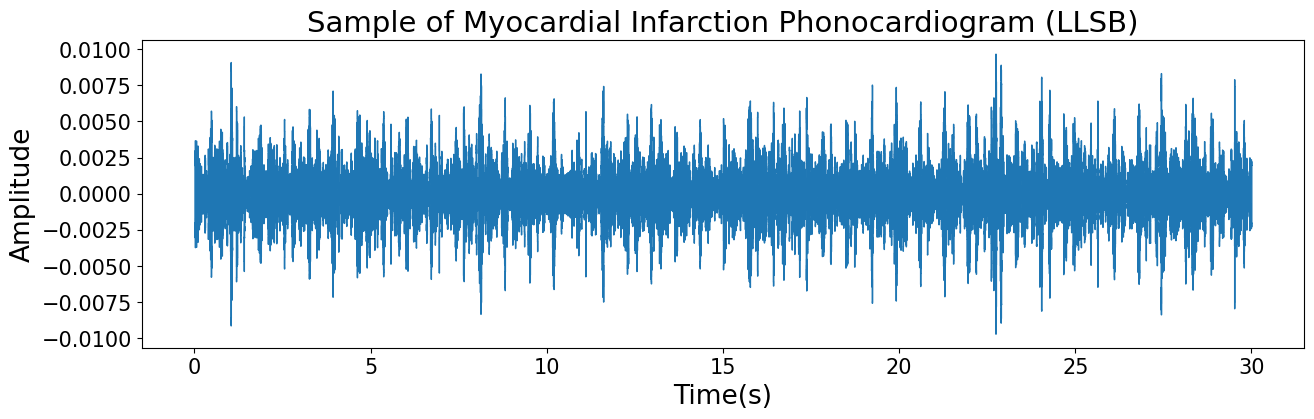

In [ ]:
file = mi_path + "Copy of Adang Wigena_LLSB_6 Juni 2022.wav"
signal, sr = librosa.load(file)
plt.figure(figsize=(15,4))
librosa.display.waveshow(signal, sr = sr)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Sample of Myocardial Infarction Phonocardiogram (LLSB)', size=21)

Text(0.5, 1.0, 'Denoised Myocardial Infarction Phonocardiogram (LLSB)')

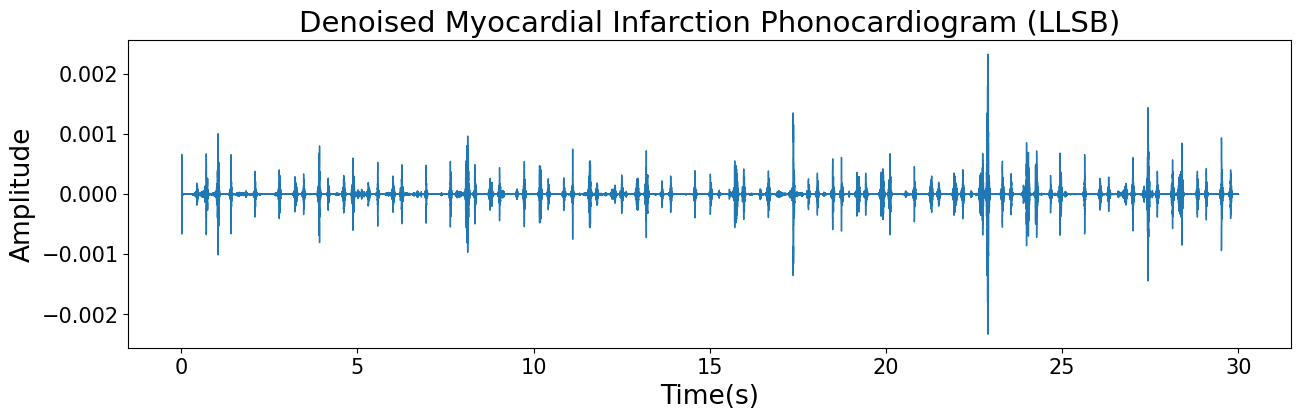

In [ ]:
audio, sfreq = librosa.load(file)
reduced_noise = nr.reduce_noise(y = audio, sr=sfreq, n_std_thresh_stationary=2,stationary=True)
plt.figure(figsize=(15,4))
librosa.display.waveshow(reduced_noise)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Denoised Myocardial Infarction Phonocardiogram (LLSB)', size=21)

Text(0.5, 1.0, 'Sample of Myocardial Infarction Phonocardiogram (RUSB)')

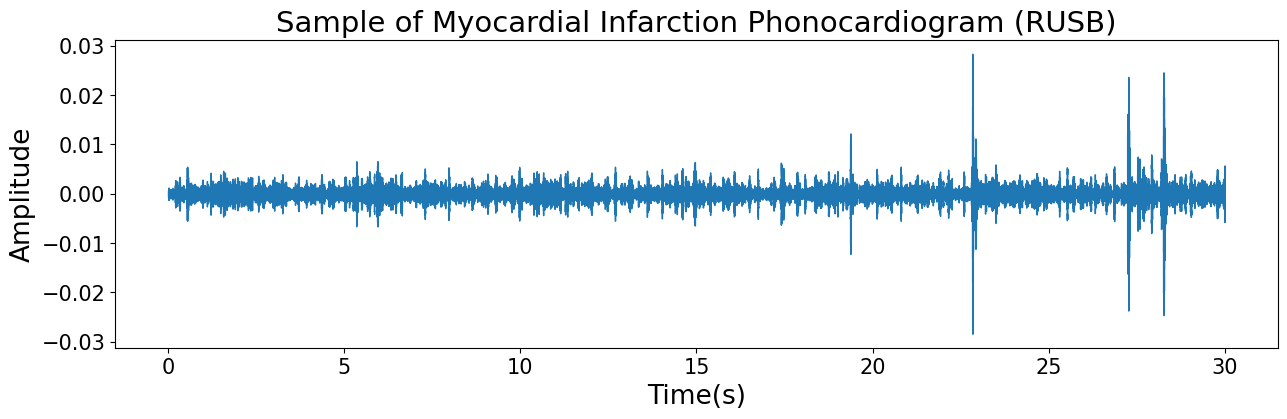

In [ ]:
file = mi_path + "Copy of Adang Wigena_RUSB_6 Juni 2022_1.wav"
signal, sr = librosa.load(file)
plt.figure(figsize=(15,4))
librosa.display.waveshow(signal, sr = sr)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Sample of Myocardial Infarction Phonocardiogram (RUSB)', size=21)

Text(0.5, 1.0, 'Denoised Myocardial Infarction Phonocardiogram (RUSB)')

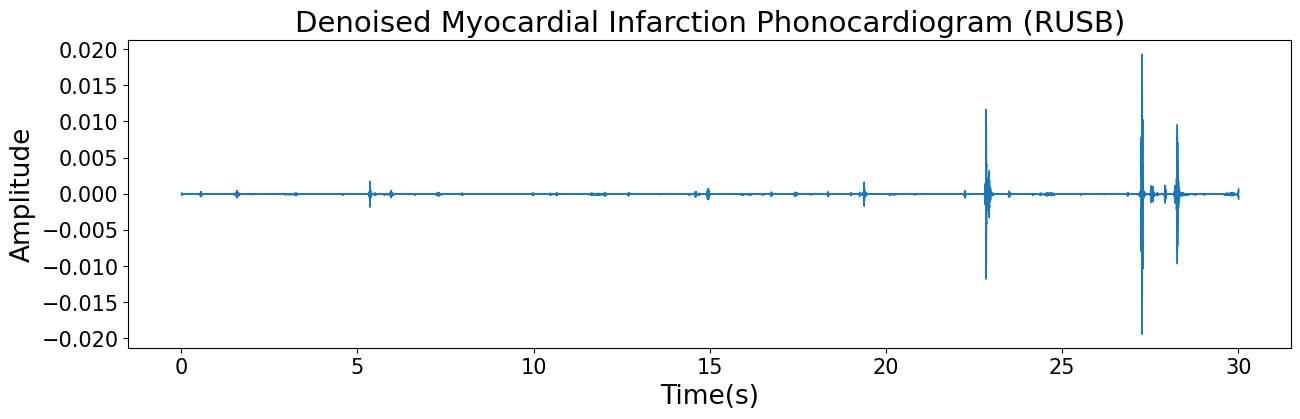

In [ ]:
audio, sfreq = librosa.load(file)
reduced_noise = nr.reduce_noise(y = audio, sr=sfreq, n_std_thresh_stationary=2,stationary=True)
plt.figure(figsize=(15,4))
librosa.display.waveshow(reduced_noise)
plt.ylabel("Amplitude", size=19)
plt.xlabel('Time(s)', size=19)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Denoised Myocardial Infarction Phonocardiogram (RUSB)', size=21)